In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("all_ECB_speeches.csv", sep="|", encoding="utf-8")
print("Shape DataFrame: ", data.shape)
print("Data size: ", data.shape[0])
data_drop_nan = data.dropna(subset=data.columns)
data.dropna(subset=data.columns, inplace=True)
print("Dropando NaN")
print("Data size: ", data_drop_nan.shape[0] )
data.head()

Shape DataFrame:  (2772, 5)
Data size:  2772
Dropando NaN
Data size:  2683


,date,speakers,title,subtitle,contents
0,2024-02-26,Christine Lagarde,European Parliament plenary debate on the ECB ...,"Speech by Christine Lagarde, President of the ...",SPEECH European Parliament plenary debate ...
2,2024-02-16,Isabel Schnabel,From laggard to leader? Closing the euro area’...,Inaugural lecture of the EMU Lab by Isabel Sch...,SPEECH From laggard to leader? Closing the ...
4,2024-02-15,Christine Lagarde,Hearing of the Committee on Economic and Monet...,"Speech by Christine Lagarde, President of the ...",SPEECH Hearing of the Committee on Economic...
6,2024-02-14,Piero Cipollone,Preserving people’s freedom to use a public me...,"Introductory statement by Piero Cipollone, Mem...",SPEECH Preserving people’s freedom to ...
7,2024-02-14,Luis de Guindos,"Monetary policy, financial stability and mediu...","Speech by Luis de Guindos, Vice-President of t...","SPEECH Monetary policy, financial stability..."


In [4]:
# Uso do dicionário de sentimentos NRC

negative_dict = {}

with open("negative-NRC-Emotion-Lexicon.txt", "r") as file:
    for line in file:
        key, value = line.strip().split("\t")
        if value != "0":
            negative_dict[key] = int(value)

print(negative_dict)

positive_dict = {}

with open("positive-NRC-Emotion-Lexicon.txt", "r") as file:
    for line in file:
        key, value = line.strip().split("\t")
        if value != "0":
            positive_dict[key] = int(value)
        
print(positive_dict)

{'dementia': 1, 'elimination': 1, 'pathetic': 1, 'lower': 1, 'gasping': 1, 'leech': 1, 'detritus': 1, 'suspension': 1, 'outhouse': 1, 'hobo': 1, 'addiction': 1, 'onus': 1, 'incomprehensible': 1, 'scarcity': 1, 'torture': 1, 'bigoted': 1, 'infiltration': 1, 'inefficient': 1, 'chafing': 1, 'enigmatic': 1, 'payment': 1, 'perversion': 1, 'evacuation': 1, 'hangman': 1, 'turbulence': 1, 'rat': 1, 'strike': 1, 'carnal': 1, 'confined': 1, 'egotistical': 1, 'freezing': 1, 'declination': 1, 'presentment': 1, 'subsidence': 1, 'carelessness': 1, 'clump': 1, 'spurious': 1, 'nihilism': 1, 'resigned': 1, 'prodigal': 1, 'fruitless': 1, 'slaughterhouse': 1, 'income': 1, 'disapproving': 1, 'confiscate': 1, 'poorly': 1, 'clouded': 1, 'poverty': 1, 'screwed': 1, 'crisp': 1, 'horrific': 1, 'injury': 1, 'unhappy': 1, 'sorely': 1, 'harass': 1, 'gap': 1, 'hypocritical': 1, 'havoc': 1, 'dagger': 1, 'lonely': 1, 'rekindle': 1, 'decrepit': 1, 'misrepresent': 1, 'remorse': 1, 'whore': 1, 'ulterior': 1, 'woefully'

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral'

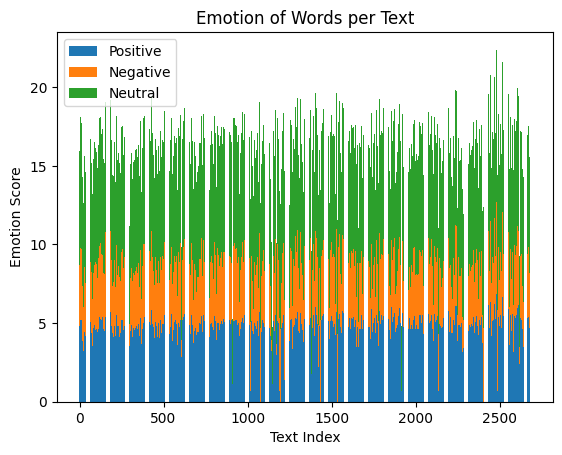

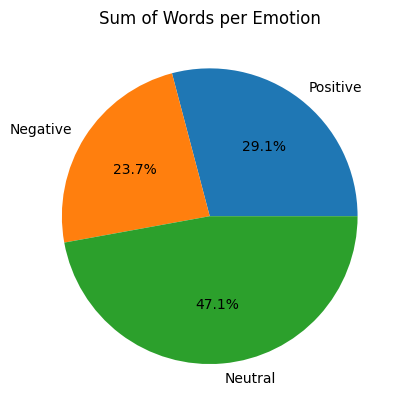

In [5]:
# Função para calcular o sentimento de um texto

def get_sentiment(text, emo_score):
    text = text.split()
    positive_score = 0
    negative_score = 0
    neutral_score = 0
    for word in text:
        if word in positive_dict:
            positive_score += positive_dict[word]
            # positive_score += 1
            if word in negative_dict:
                negative_score += negative_dict[word]
                # negative_score += 1
        elif word in negative_dict:
            # negative_score += negative_dict[word] #Pode ser 1 ou zero
            negative_score += 1
        else:
            neutral_score += 1
    emo_score.append([positive_score, negative_score, neutral_score])
    # print("Positive Score: ", positive_score)
    # print("Negative Score: ", negative_score)
    # print("Neutral Score: ", neutral_score)
    if positive_score > negative_score and positive_score > neutral_score:
        return "positive", emo_score
    elif positive_score < negative_score and negative_score > neutral_score:
        return "negative", emo_score
    else:
        return "neutral", emo_score

emotions_per_text = []
predictions_dict = []
for content in data["contents"]:
    if type(content) == float:
        predictions_3.append(np.nan) 
    else:
        outputs, emotions_per_text = get_sentiment(content, emotions_per_text)
        predictions_dict.append(outputs)
print(predictions_dict)
print(len(predictions_dict))
print(emotions_per_text)

import matplotlib.pyplot as plt
import math as m

# Extract the emotion scores from the emotions_per_text variable
positive_scores = [m.log(score[0]+1) for score in emotions_per_text]
negative_scores = [m.log(score[1]+1) for score in emotions_per_text]
neutral_scores = [m.log(score[2]+1) for score in emotions_per_text]

# Set the x-axis values
x = range(len(emotions_per_text))

# Create the stacked bar plot
plt.bar(x, positive_scores, label='Positive')
plt.bar(x, negative_scores, bottom=positive_scores, label='Negative')
plt.bar(x, neutral_scores, bottom=[p + n for p, n in zip(positive_scores, negative_scores)], label='Neutral')

# Add labels and title
plt.xlabel('Text Index')
plt.ylabel('Emotion Score')
plt.title('Emotion of Words per Text')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Importar a biblioteca matplotlib.pyplot
import matplotlib.pyplot as plt

# Definir os rótulos e os valores para cada label
labels = ['Positive', 'Negative', 'Neutral']
values = [sum(positive_scores), sum(negative_scores), sum(neutral_scores)]

# Criar o gráfico de setores
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Adicionar título
plt.title('Sum of Words per Emotion')

# Mostrar o gráfico
plt.show()



In [6]:
import pandas as pd

# Caminho do arquivo CSV
filepath = 'mclou.csv'

# Abrir o arquivo CSV
mclou = pd.read_csv(filepath, sep=';', encoding='utf-8')

# Exibir o conteúdo do DataFrame
# print(mclou)

mclou_dict = {str(mclou['Word'][i]).lower(): [mclou['Positive'][i], mclou['Negative'][i]] for i in range(len(mclou))}
for key, value in mclou_dict.items():
    if mclou_dict[key][0] != 0:
        mclou_dict[key][0] = 1
    if mclou_dict[key][1] != 0:
        mclou_dict[key][1] = 1
# print(mclou_dict)
for i in range(10):
    print(mclou['Word'][i], mclou['Positive'][i], mclou['Negative'][i])
    print(mclou_dict[str(mclou['Word'][i]).lower()])


AARDVARK 0 0
[0, 0]
AARDVARKS 0 0
[0, 0]
ABACI 0 0
[0, 0]
ABACK 0 0
[0, 0]
ABACUS 0 0
[0, 0]
ABACUSES 0 0
[0, 0]
ABAFT 0 0
[0, 0]
ABALONE 0 0
[0, 0]
ABALONES 0 0
[0, 0]
ABANDON 0 2009
[0, 1]


['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral'

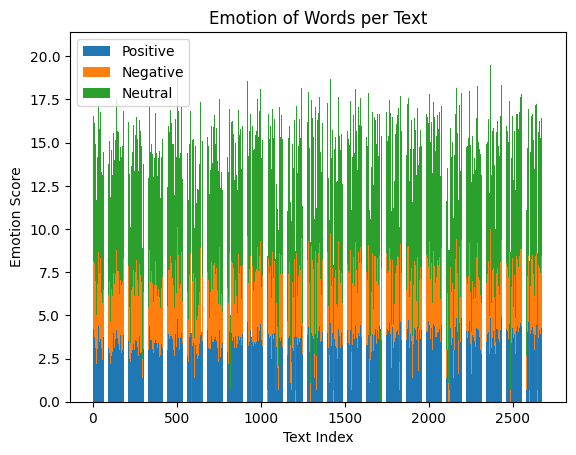

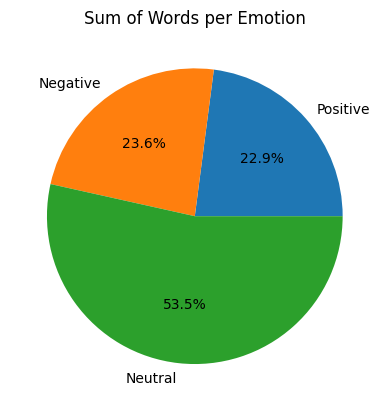

In [7]:
def get_sentiment_mclou(text, emo_score):
    text = text.split()
    positive_score = 0
    negative_score = 0
    neutral_score = 0
    for word in text:
        word = word.lower()
        if word in mclou_dict:
            positive_score += mclou_dict[word][0]
            negative_score += mclou_dict[word][1]
            if mclou_dict[word][0] == 0 and mclou_dict[word][1] == 0:
                neutral_score += 1
        else:
            neutral_score += 1
    emo_score.append([positive_score, negative_score, neutral_score])
    # print("Positive Score: ", positive_score)
    # print("Negative Score: ", negative_score)
    # print("Neutral Score: ", neutral_score)
    if positive_score > negative_score and positive_score > neutral_score:
        return "positive", emo_score
    elif positive_score < negative_score and negative_score > neutral_score:
        return "negative", emo_score
    else:
        return "neutral", emo_score

emotions_per_text = []
predictions_dict = []
for content in data["contents"]:
    if type(content) == float:
        predictions_3.append(np.nan) 
    else:
        outputs, emotions_per_text = get_sentiment_mclou(content, emotions_per_text)
        predictions_dict.append(outputs)
print(predictions_dict)
print(len(predictions_dict))
print(emotions_per_text)

# Extract the emotion scores from the emotions_per_text variable
# print(len(emotions_per_text))
# for i in range(len(emotions_per_text)):
#     try:
#         print(m.log(emotions_per_text[i][0]+1))
#     except:
#         print(emotions_per_text[i][0])
#         print(i)
#         print(emotions_per_text[i])
#         raise
positive_scores = [m.log(score[0]+1) for score in emotions_per_text]
negative_scores = [m.log(score[1]+1) for score in emotions_per_text]
neutral_scores = [m.log(score[2]+1) for score in emotions_per_text]

# Set the x-axis values
x = range(len(emotions_per_text))

# Create the stacked bar plot
plt.bar(x, positive_scores, label='Positive')
plt.bar(x, negative_scores, bottom=positive_scores, label='Negative')
plt.bar(x, neutral_scores, bottom=[p + n for p, n in zip(positive_scores, negative_scores)], label='Neutral')

# Add labels and title
plt.xlabel('Text Index')
plt.ylabel('Emotion Score')
plt.title('Emotion of Words per Text')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Definir os rótulos e os valores para cada label
labels = ['Positive', 'Negative', 'Neutral']
values = [sum(positive_scores), sum(negative_scores), sum(neutral_scores)]

# Criar o gráfico de setores
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Adicionar título
plt.title('Sum of Words per Emotion')

# Mostrar o gráfico
plt.show()

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral'

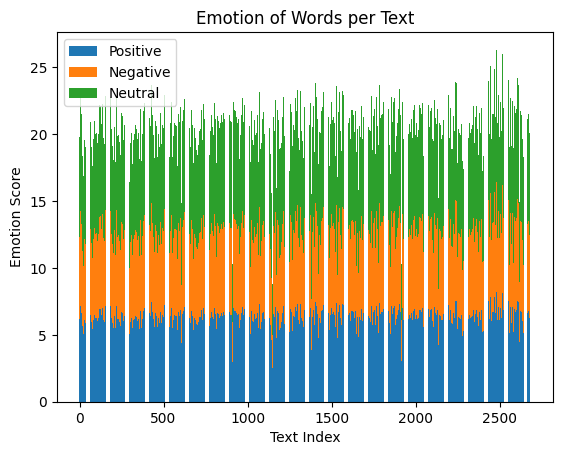

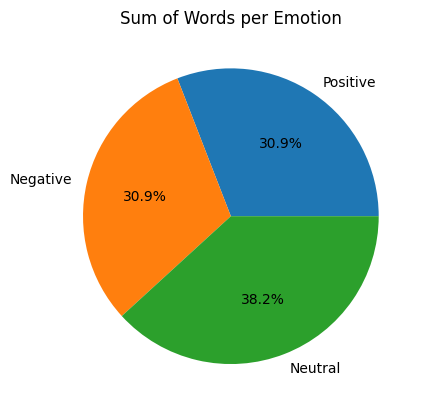

In [8]:
def get_sentiment_double(text, emo_score):
    text = text.split()
    positive_score = 0
    negative_score = 0
    neutral_score = 0
    for word in text:
        word = word.lower()
        if word in mclou_dict:
            if word in positive_dict or mclou_dict[word][0] != 0:
                positive_score += 1
            elif word in negative_dict or mclou_dict[word][1] != 0:
                negative_score += 1
            if (mclou_dict[word][0] == 0 and mclou_dict[word][1] == 0) or (word not in positive_dict and word not in negative_dict):
                neutral_score += 1
        elif word in positive_dict:
            positive_score += 1
        elif word in negative_dict:
            negative_score += 1
        else:
            neutral_score += 1
    emo_score.append([positive_score, negative_score, neutral_score])
    
    if positive_score > negative_score and positive_score > neutral_score:
        return "positive", emo_score
    elif positive_score < negative_score and negative_score > neutral_score:
        return "negative", emo_score
    else:
        return "neutral", emo_score
    

emotions_per_text = []
predictions_dict = []
for content in data["contents"]:
    if type(content) == float:
        predictions_3.append(np.nan) 
    else:
        outputs, emotions_per_text = get_sentiment_double(content, emotions_per_text)
        predictions_dict.append(outputs)
print(predictions_dict)
print(len(predictions_dict))
print(emotions_per_text)

positive_scores = [m.log(score[0]+1) for score in emotions_per_text]
negative_scores = [m.log(score[1]+1) for score in emotions_per_text]
neutral_scores = [m.log(score[2]+1) for score in emotions_per_text]

# Set the x-axis values
x = range(len(emotions_per_text))

# Create the stacked bar plot
plt.bar(x, positive_scores, label='Positive')
plt.bar(x, negative_scores, bottom=positive_scores, label='Negative')
plt.bar(x, neutral_scores, bottom=[p + n for p, n in zip(positive_scores, negative_scores)], label='Neutral')

# Add labels and title
plt.xlabel('Text Index')
plt.ylabel('Emotion Score')
plt.title('Emotion of Words per Text')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Definir os rótulos e os valores para cada label
labels = ['Positive', 'Negative', 'Neutral']
values = [sum(positive_scores), sum(negative_scores), sum(neutral_scores)]

# Criar o gráfico de setores
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Adicionar título
plt.title('Sum of Words per Emotion')

# Mostrar o gráfico
plt.show()